Load the data: You can load the dataset into a software program that allows for data analysis, such as Python or R. You can use pandas library in Python to read the dataset as a dataframe.

Data cleaning: Check for missing values and outliers, and remove or impute them as necessary. Check for duplicated rows, and remove them if applicable.

Data exploration: You can explore the dataset using various methods, such as descriptive statistics, visualization, and clustering. This can help you understand the distribution of the data and identify any patterns or relationships.

Data transformation: You may need to transform the data to make it suitable for analysis. For example, you may need to normalize or standardize the data, convert categorical variables to numeric ones, or aggregate the data at different taxonomic levels.

Analysis: You can perform various types of analysis on the data, depending on your research question. Some common analysis methods for taxonomic abundance data include alpha diversity analysis, beta diversity analysis, and differential abundance analysis.

Interpretation: After analyzing the data, you can interpret the results and draw conclusions about the organisms present in the sample and their relative abundances at different taxonomic level

# 1 Machine Learning

Specifically analyze which species can represent the characteristics of a certain population using machine learning.

In [5]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2 Load Data

In [10]:
# load the datasets
archaea = pd.read_csv("Archaea.csv")
bacteria = pd.read_csv("Bacteria.csv")
fungus = pd.read_csv("fungus.csv")
virus = pd.read_csv("virus.csv")

In [40]:
df_fungus = fungus.copy(deep=True)
df_fungus.Species.value_counts()

s__unclassified_k__Fungi              162
s__Fungi_sp                            43
s__Rozellomycota_sp                    39
s__unclassified_g__Apiotrichum         27
s__Aspergillus_penicillioides          27
                                     ... 
s__Didymella_molleriana                 1
s__Saitozyma_paraflava                  1
s__Sagenomella_griseoviridis            1
s__Robbauera_sp                         1
s__unclassified_g__Bulleribasidium      1
Name: Species, Length: 725, dtype: int64

## 3 Data Cleaning
* Check for missing values and outliers, and remove or impute them as necessary. 
* Check for duplicated rows, and remove them if applicable.

###  missing values

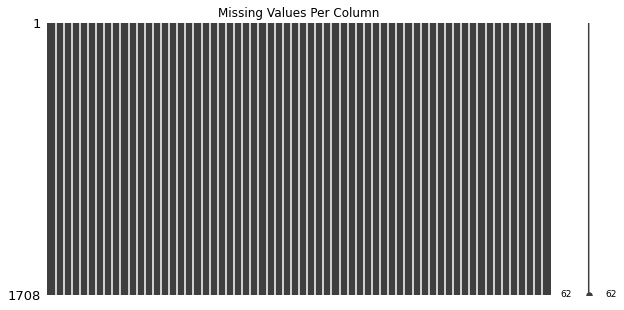

In [12]:
# import missingno package
import missingno as msno

def data_cleaner(my_df):   
    # plot a matrix chart, set chart and font size
    msno.matrix(my_df, figsize=(10,5), fontsize=11)

    plt.title("Missing Values Per Column")
    # show the figure
    plt.show()


# call function
data_cleaner(df_fungus)

>no columns with missing values

## 4 Data Exploration
* descriptive

In [13]:
df_fungus

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV,SUM,...,p8,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9
0,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_albicans,ASV413,95969,...,0,0,0,0,0,0,0,0,0,0
1,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_albicans,ASV970,2882,...,0,0,0,0,0,0,0,0,0,0
2,d__Eukaryota,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,s__unclassified_g__Aspergillus,ASV11,89015,...,1814,698,789,13,1266,451,1247,134,1132,613
3,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Trichosporonales,f__Trichosporonaceae,g__Apiotrichum,s__unclassified_g__Apiotrichum,ASV1,573839,...,8155,2779,12386,3655,12088,9760,14581,13921,15390,16039
4,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Tremellales,f__Tremellaceae,g__Cryptococcus_f__Tremellaceae,s__Cryptococcus_cyanovorans,ASV3,177670,...,6658,1494,6101,1860,5264,6783,6931,5940,3258,3280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,d__Eukaryota,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Pleosporales,f__Biatriosporaceae,g__Biatriospora,s__Biatriospora_sp,ASV328,2,...,0,0,0,0,0,0,0,0,0,0
1704,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Tremellales,f__Bulleribasidiaceae,g__Bulleribasidium,s__unclassified_g__Bulleribasidium,ASV329,2,...,0,0,0,0,0,0,0,0,0,0
1705,d__Eukaryota,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Microascales,f__Microascaceae,g__Pseudallescheria,s__unclassified_g__Pseudallescheria,ASV330,2,...,0,0,0,0,0,0,0,0,0,0
1706,d__Eukaryota,k__Fungi,p__Rozellomycota,c__unclassified_p__Rozellomycota,o__unclassified_p__Rozellomycota,f__unclassified_p__Rozellomycota,g__unclassified_p__Rozellomycota,s__Rozellomycota_sp,ASV331,2,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# display basic statistics of the abundance data
df_fungus.describe()

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,p8,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,...,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,1024.327869,0.000585,21.626464,18.642272,20.207260,16.758197,22.153981,17.234778,16.964286,17.160422,...,31.566745,16.317330,18.617096,11.672131,19.046253,16.846019,21.888173,18.618852,17.018150,19.040984
std,15062.243909,0.008609,387.657163,191.001128,373.448794,207.161296,249.303050,176.549783,259.901992,473.604970,...,295.309153,172.838768,341.683205,204.335244,331.236116,295.256921,405.601751,371.586345,383.704519,400.371603
min,2.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.500000,0.000038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,196.250000,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,573839.000000,0.327992,12133.000000,5620.000000,14867.000000,6881.000000,5951.000000,4542.000000,9802.000000,19108.000000,...,8155.000000,3631.000000,12386.000000,7230.000000,12088.000000,9760.000000,14581.000000,13921.000000,15390.000000,16039.000000


### clustering

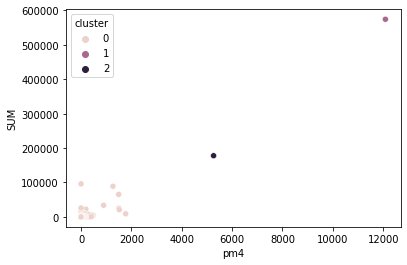

In [17]:
# use clustering to identify patterns in the data
from sklearn.cluster import KMeans
X = df_fungus[['pm4', 'Percent']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df_fungus['cluster'] = kmeans.predict(X)

# visualize the clusters using a scatter plot
sns.scatterplot(data=df_fungus, x='pm4', y='SUM', hue='cluster')

# show the plots
plt.show()

### Transformation

### column data type
* categorical
* numerical

In [18]:
# get categorical columns
tax_cols = ['ASV', 'Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
categorical_columns = df_fungus[tax_cols]

# get numerical columns
numerical_columns = df_fungus.drop(tax_cols, axis=1)

### normalize

In [23]:
# import relevant libraries
from sklearn.preprocessing import normalize

# normalize the abundance data using L1 norm
df_norm = pd.DataFrame(normalize(numerical_columns, norm='l1'), columns=numerical_columns.columns)

# print the normalized data
df_norm.head()

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9,cluster
0,0.500000,2.857874e-07,0.063213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.500000,2.857874e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.500000,2.857874e-07,0.005611,0.011442,0.011245,0.002033,0.004583,0.011582,0.009701,0.012228,...,0.003921,0.004432,0.000073,0.007111,0.002533,0.007004,0.000753,0.006358,0.003443,0.000000e+00
3,0.499999,2.857871e-07,0.008488,0.004897,0.012954,0.002229,0.003706,0.002942,0.002319,0.001875,...,0.002421,0.010792,0.003185,0.010533,0.008504,0.012705,0.012130,0.013410,0.013975,8.713235e-07
4,0.499997,2.857858e-07,0.009005,0.007016,0.007683,0.001492,0.007815,0.006529,0.003242,0.001689,...,0.004204,0.017169,0.005234,0.014814,0.019089,0.019505,0.016716,0.009169,0.009231,5.628379e-06


### conversion of categorical

In [21]:
# import relevant libraries
from sklearn.preprocessing import LabelEncoder


# extract the columns of interest
df_taxonomic = categorical_columns.drop(["ASV"], axis=1)

# convert the taxonomic variables to numeric using label encoding
le = LabelEncoder()
df_taxonomic_enc = df_taxonomic.apply(le.fit_transform)

# print the encoded data
df_taxonomic_enc.head()

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,0,0,0,24,59,145,46,65
1,0,0,0,24,59,145,46,65
2,0,0,0,8,26,9,26,605
3,0,0,1,28,70,177,16,603
4,0,0,1,28,67,171,79,119


#### Taxonomic abundance table

>all featues values

In [39]:
# group the abundance data by phylum and sum the values within each group
df_phylum = df_fungus.groupby('Species').sum()

# print the aggregated data
df_phylum.head(7)

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9,cluster
Species,,,,,,,,,,,,,,,,,,,,,
s__Acanthostigma_perpusillum,13,0.000007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Acaulium_acremonium,190,0.000109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Achaetomium_sp,3,0.000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Acremonium_acutatum,636,0.000364,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,318,0,0,0
s__Acremonium_charticola,64,0.000037,0,64,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Acremonium_fusidioides,17,0.000010,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s__Acremonium_masseei,88,0.000050,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analysis

**Alpha diversity analysis**

Alpha diversity analysis involves calculating diversity metrics for a single sample. One common metric is the Shannon index, which measures the species diversity based on the number of species and their relative abundances. 

In [26]:
from scipy.spatial.distance import pdist
from scipy.stats import entropy

# load the data into a pandas DataFrame
df = df_fungus

# calculate the Bray-Curtis dissimilarity between each pair of samples
bray_curtis = pdist(df.drop(['Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'ASV', 'SUM', 'Percent'], axis=1).values, metric='braycurtis')

# print the Bray-Curtis dissimilarity matrix
bray_curtis

array([0.94169002, 0.96127233, 0.94425874, ..., 0.        , 0.        ,
       0.        ])

**Differential abundance analysis**

Differential abundance analysis involves comparing the abundance of specific taxa between two or more groups of samples. One common method is the Wilcoxon rank-sum test, which tests whether the abundance of a given taxon is significantly different between two groups of samples

In [43]:
from scipy.stats import ranksums

# load the data into a pandas DataFrame
df = df_fungus

# separate the data into two groups based on a categorical variable
group_1 = df[df['pm4'] == 0].drop(['Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'], axis=1)

group_2 = df[df['pm4'] != 0].drop(['Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'], axis=1)

results = []
for taxon in group_1.columns:
    if taxon not in ['Category', 'ASV', 'SUM', 'Percent']:
        stat, pval = ranksums(group_1[taxon], group_2[taxon])
results.append((taxon, pval))

alpha = 0.05
n_tests = len(results)
adjusted_alpha = alpha / n_tests
for i in range(len(results)):
    if results[i][1] < adjusted_alpha:
        print(f"{results[i][0]} is differentially abundant (p-value: {results[i][1]:.3g})")
    else:
        print(f"{results[i][0]} is not differentially abundant (p-value: {results[i][1]:.3g})")

pm9 is differentially abundant (p-value: 0.000162)
